In [175]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import missingno as msno
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
tc = pd.read_csv("titanic-passengers.csv",sep = ';',header = 0 )
tc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [176]:
tc.info()
tc.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

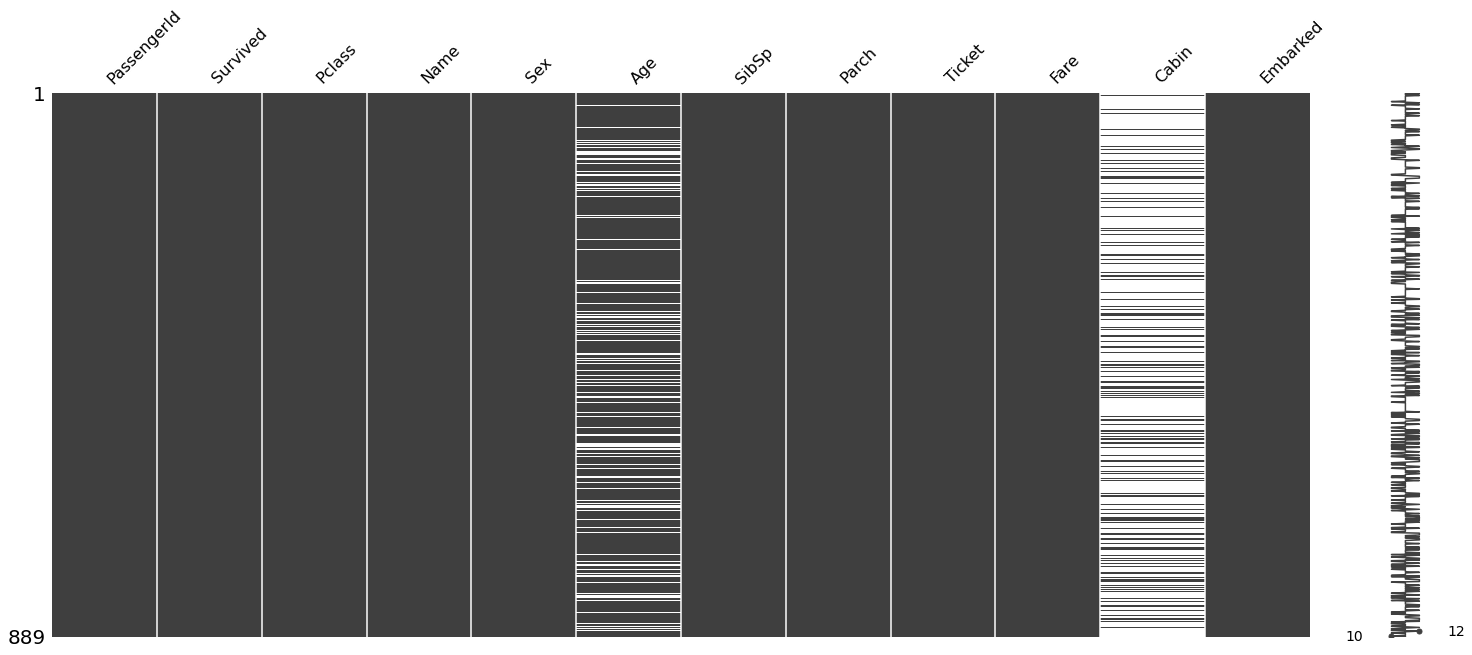

In [81]:
msno.matrix(tc)
tc.isnull().sum()

In [177]:
tc = tc.fillna(value = {"Age":np.ceil(tc["Age"].mean())}) #missing age values are imputed with the mean
tc["Cabin"].value_counts()# G6 is the most frequent but because huge no of data are missing we'll create new cabin named H95
tc = tc.fillna(value = {"Cabin":"H95"}) #missing Cabin values are imputed with the most freq
tc[["Cabin","Age"]].head()

,Cabin,Age
0,H95,28.0
1,F G73,25.0
2,H95,20.0
3,H95,29.0
4,B71,31.0


In [178]:
tc.dropna(subset=['Embarked',"Name"],inplace=True)
tc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,H95,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,H95,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,H95,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,H95,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,H95,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,H95,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,30.0,0,0,349215,7.8958,H95,S


In [179]:
le = LabelEncoder()
tc["Sex"]= le.fit_transform(tc["Sex"])
tc["Survived"]= le.fit_transform(tc["Survived"])
tc["Cabin"] = le.fit_transform(tc["Cabin"])
tc["Embarked"]=le.fit_transform(tc["Embarked"])
tc["Fare"] = tc["Fare"].astype(int)
tc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13,145,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7,139,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7,145,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21,145,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30,145,0
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7,145,0
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8,145,2
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,30.0,0,0,349215,7,145,2


In [180]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int32  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int32  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    int32  
 10  Cabin        889 non-null    int32  
 11  Embarked     889 non-null    int32  
dtypes: float64(1), int32(5), int64(4), object(2)
memory usage: 72.9+ KB


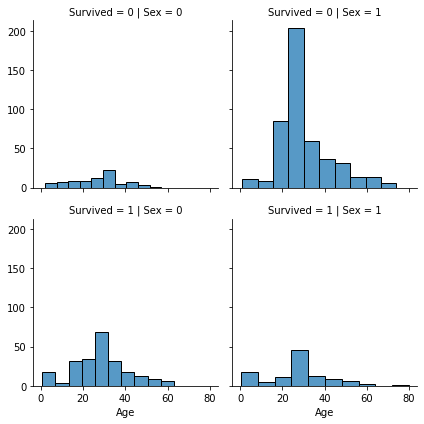

In [181]:
graph = sns.FacetGrid(tc,col = "Sex",row = "Survived")
graph.map(sns.histplot,"Age", bins= 10)

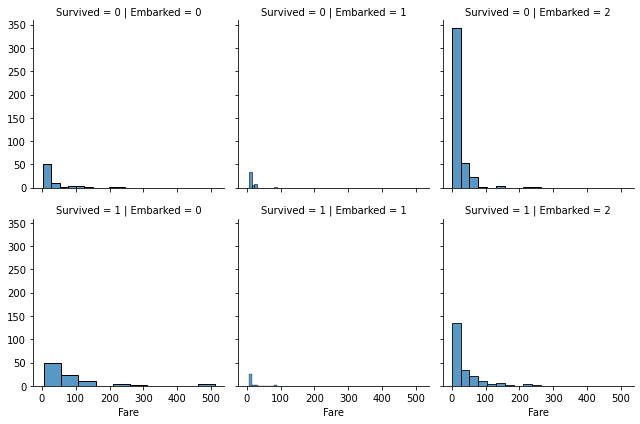

In [184]:
graph = sns.FacetGrid(tc,col = "Embarked",row = "Survived")
graph.map(sns.histplot,"Fare", bins= 10)

"\nplot_correlation_map generate a heat map to correlate between the data variables , the more  value approches to 1 or -1 means highy related variables,\n  the more the vaule approches to 0 means poorly related variables, we will describe the relation between Survived and Sex , the value is -0.54 , it's highly relatable value and it represent that the most of the survived persons belong the other  Female sex (enconded by 0 ) , also the observed that high the fare is , the higher survival rate. "

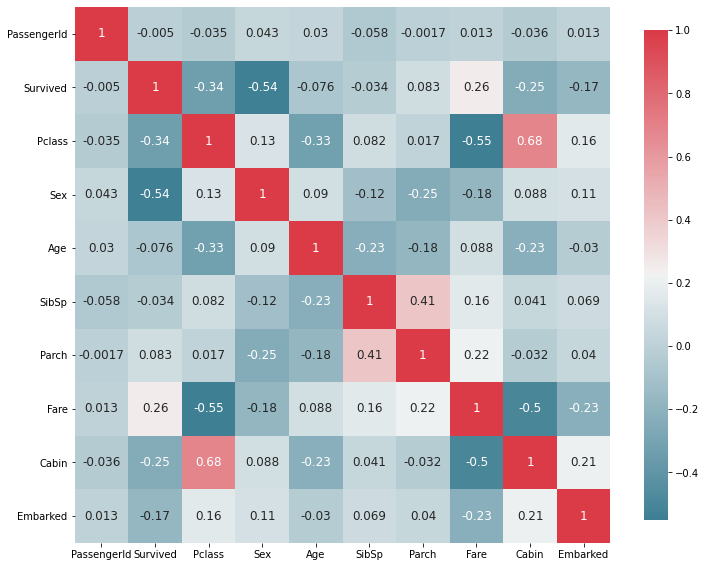

In [183]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
plot_correlation_map(tc)
"""
plot_correlation_map generate a heat map to correlate between the data variables , the more  value approches to 1 or -1 means highy related variables,
  the more the vaule approches to 0 means poorly related variables, we will describe the relation between Survived and Sex , the value is -0.54 , it's highly relatable value and it represent that the most of the survived persons belong the other  Female sex (enconded by 0 ) , also the observed that high the fare is , the higher survival rate. """

In [185]:
tc[["Survived", "Pclass"]].groupby(by = "Pclass").mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [186]:
tc.drop(["Name","Ticket"],axis = 1)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,343,0,2,1,28.0,0,0,13,145,2
1,76,0,3,1,25.0,0,0,7,139,2
2,641,0,3,1,20.0,0,0,7,145,2
3,568,0,3,0,29.0,0,4,21,145,2
4,672,0,1,1,31.0,1,0,52,37,2
...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.0,1,0,30,145,0
887,61,0,3,1,22.0,0,0,7,145,0
888,535,0,3,0,30.0,0,0,8,145,2
889,102,0,3,1,30.0,0,0,7,145,2


In [229]:
def title(x):
    if ',' in x and '.' in x :
        return x[x.index(',')+1:x.index('.')]
tc['Title']=tc["Name"]
tc['Title']=tc["Title"].apply(title)
tc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13,145,2,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7,139,2,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7,145,2,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21,145,2,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52,37,2,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30,145,0,Mrs
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7,145,0,Mr
888,535,0,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8,145,2,Miss
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,30.0,0,0,349215,7,145,2,Mr


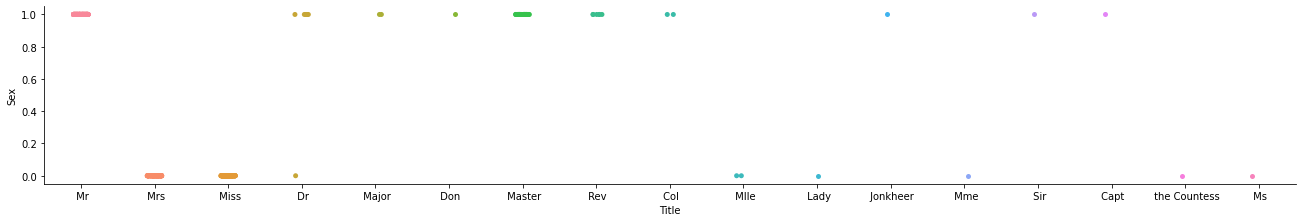

In [210]:
sns.catplot(x="Title", y="Sex", data=tc,height=3, aspect=6 )

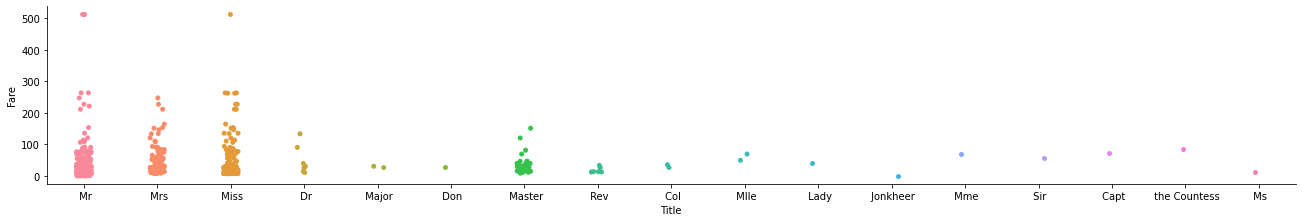

In [211]:
sns.catplot(x="Title", y="Fare", data=tc,height=3, aspect=6 )

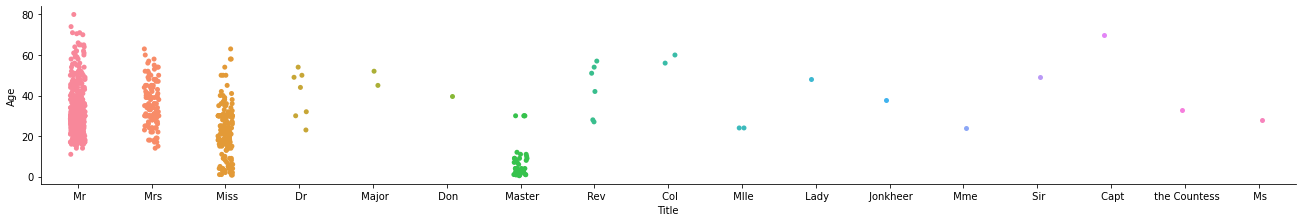

In [212]:
sns.catplot(x="Title", y="Age", data=tc,height=3, aspect=6 )

In [234]:
Title_Dictionary = {
"Capt":       "Officer",
"Col":        "Officer",
"Major":      "Officer",
"Dr":         "Officer",
"Rev":        "Officer",
"Jonkheer":   "Royalty",
"Don":        "Royalty",
"Sir" :       "Royalty",
"Lady" :      "Royalty",
"the Countess" : "Royalty",
"Dona":       "Royalty",
"Mme":        "Miss",
"Mlle":       "Miss",
"Miss" :      "Miss",
"Ms":         "Mrs",
"Mr" :        "Mrs",
"Mrs" :       "Mrs",
"Master" :    "Master"
                    }
tc.replace(Title_Dictionary , inplace = True)
tc["Title"]

0         Mr
1         Mr
2         Mr
3        Mrs
4         Mr
       ...  
886      Mrs
887       Mr
888     Miss
889       Mr
890     Miss
Name: Title, Length: 889, dtype: object

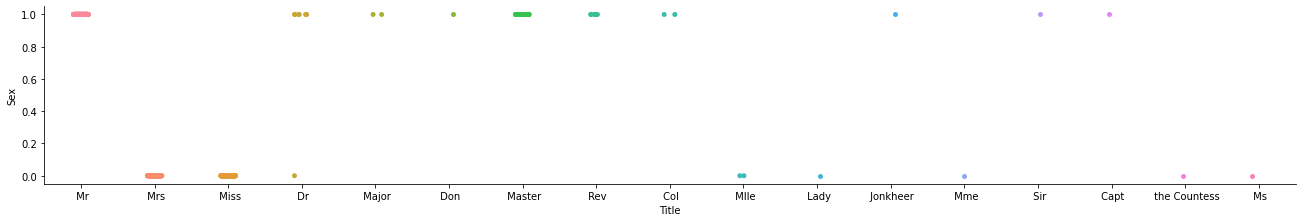

In [236]:
sns.catplot(x="Title", y="Sex", data=tc,height=3, aspect=6 )

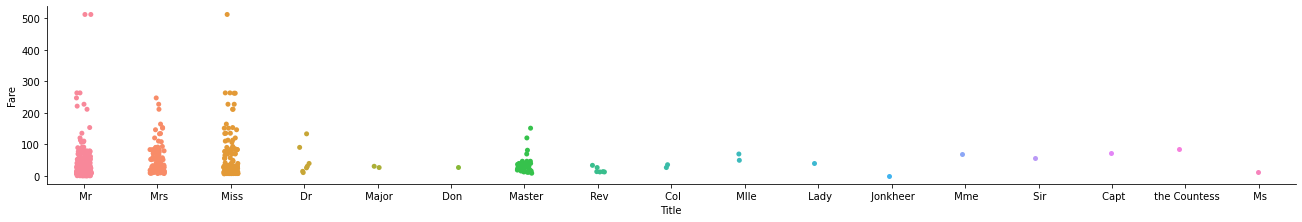

In [237]:
sns.catplot(x="Title", y="Fare", data=tc,height=3, aspect=6 )

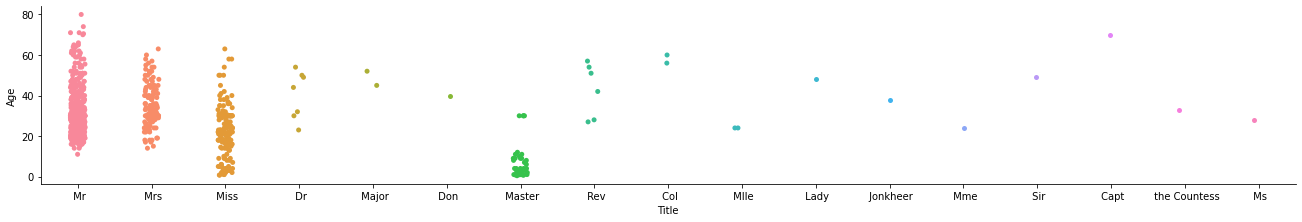

In [238]:
sns.catplot(x="Title", y="Age", data=tc,height=3, aspect=6 )

In [239]:
tc["FamilySize"] = tc["SibSp"] + tc["Parch"]
tc["FamilySize"]

0      0
1      0
2      0
3      4
4      1
      ..
886    1
887    0
888    0
889    0
890    0
Name: FamilySize, Length: 889, dtype: int64

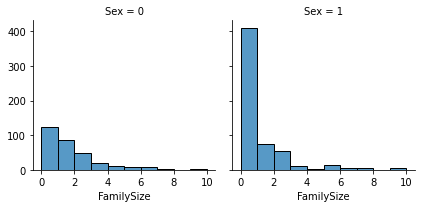

In [241]:
graph = sns.FacetGrid(tc,col = "Sex")
graph.map(sns.histplot,"FamilySize", bins= 10)